In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取文件
file_path = 'earthquakes-2024-11-05_13-21-08_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

# 检查数据的前几行以确保正确读取
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [3]:
#1.1
# 检查是否存在'Country'和'Total Deaths'列
if 'Country' in Sig_Eqs.columns and 'Total Deaths' in Sig_Eqs.columns:
    # 移除缺失值
    deaths_df = Sig_Eqs[['Country', 'Total Deaths']].dropna()

    # 确保'Total Deaths'列是数字类型
    deaths_df['Total Deaths'] = pd.to_numeric(deaths_df['Total Deaths'], errors='coerce')
    deaths_df = deaths_df.dropna(subset=['Total Deaths'])

    # 对每个国家的死亡人数进行分组和求和
    country_deaths = deaths_df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)

    # 获取死亡人数最多的前20个国家
    top_20_countries = country_deaths.head(20)
else:
    top_20_countries = "相关列不存在于数据中"

top_20_countries

Country
CHINA           2042831.0
TURKEY           995648.0
IRAN             758654.0
SYRIA            437700.0
ITALY            422679.0
JAPAN            356605.0
HAITI            323776.0
AZERBAIJAN       310119.0
INDONESIA        282827.0
ARMENIA          189000.0
PAKISTAN         143712.0
ECUADOR          134445.0
TURKMENISTAN     110412.0
PERU              96876.0
PORTUGAL          82572.0
GREECE            82277.0
IRAQ              70200.0
CHILE             70175.0
INDIA             62412.0
TAIWAN            57723.0
Name: Total Deaths, dtype: float64

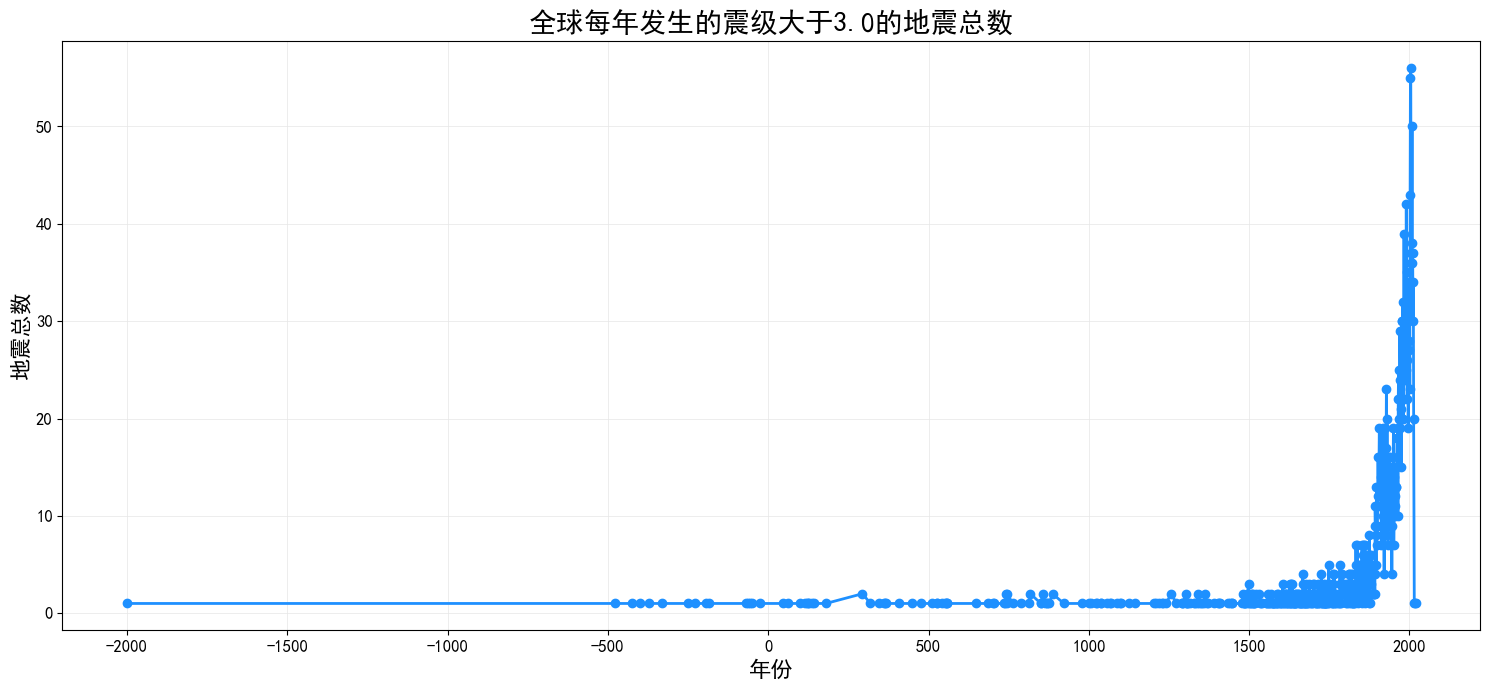

In [4]:
#1.2
# 使用 .loc 安全地设置 Year 列的值
Sig_Eqs.loc[:, 'Year'] = pd.to_numeric(Sig_Eqs['Year'], errors='coerce')
large_eqs = Sig_Eqs.dropna(subset=['Year'])

# 筛选出震级大于3.0的地震
large_eqs = large_eqs[large_eqs['Ms'] > 3.0]

# 将地震按年份分组并计数
eq_counts_by_year = large_eqs.groupby('Year').size()

# 使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 适用于中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号显示正常

# 重新绘制地震总数时间序列图
plt.figure(figsize=(15, 7))
eq_counts_by_year.plot(kind='line', marker='o', color='dodgerblue', linewidth=2)
plt.title('全球每年发生的震级大于3.0的地震总数', fontsize=20)
plt.xlabel('年份', fontsize=16)
plt.ylabel('地震总数', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', color='0.9', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [5]:
#1.3
def CountEq_LargestEq(country):
    # 筛选出指定国家的地震记录
    country_eqs = Sig_Eqs[Sig_Eqs['Country'] == country]
    
    # 计算地震总数
    total_eqs = country_eqs.shape[0]
    
    # 移除震级列中的缺失值
    country_eqs = country_eqs.dropna(subset=['Ms'])
    
    # 找出最大地震
    if total_eqs > 0 and not country_eqs.empty:
        largest_eq = country_eqs.loc[country_eqs['Ms'].idxmax()]
        largest_eq_date = f"{largest_eq['Year']}-{largest_eq['Mo']}-{largest_eq['Dy']}"
        largest_eq_location = f"{largest_eq['Latitude']}, {largest_eq['Longitude']}"
        largest_eq_info = (largest_eq_date, largest_eq_location)
    else:
        largest_eq_info = ("No data", "No data")
    
    return total_eqs, largest_eq_info
# 获取数据集中所有唯一的国家的列表
countries = Sig_Eqs['Country'].unique()

# 显示所有国家的地震总数和最大地震信息
all_countries_results = [(country, *CountEq_LargestEq(country)) for country in countries]
sorted_all_countries_results = sorted(all_countries_results, key=lambda x: x[1], reverse=True)

# 将结果转换为 DataFrame 以便显示
results_df = pd.DataFrame(sorted_all_countries_results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake Info'])
results_df

,Country,Total Earthquakes,Largest Earthquake Info
0,CHINA,623,"(1920.0-12.0-16.0, 36.601, 105.317)"
1,JAPAN,419,"(869.0-7.0-13.0, 38.5, 143.8)"
2,INDONESIA,412,"(2004.0-12.0-26.0, 3.295, 95.982)"
3,IRAN,386,"(856.0-12.0-22.0, 36.2, 54.3)"
4,TURKEY,337,"(1939.0-12.0-26.0, 39.907, 39.586)"
...,...,...,...
153,CZECH REPUBLIC,1,"(No data, No data)"
154,MADAGASCAR,1,"(No data, No data)"
155,ZAMBIA,1,"(No data, No data)"
156,COMOROS,1,"(No data, No data)"
